交互展示可能性的探究

idea：
鼠标点击matplotlib生成的图片上的任意一个位置，
matplotlib重新绘图生成图片

https://stackoverflow.com/questions/43545050/using-matplotlib-notebook-after-matplotlib-inline-in-jupyter-notebook-doesnt
https://stackoverflow.com/questions/43963128/refresh-plot-after-mouse-click-event

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


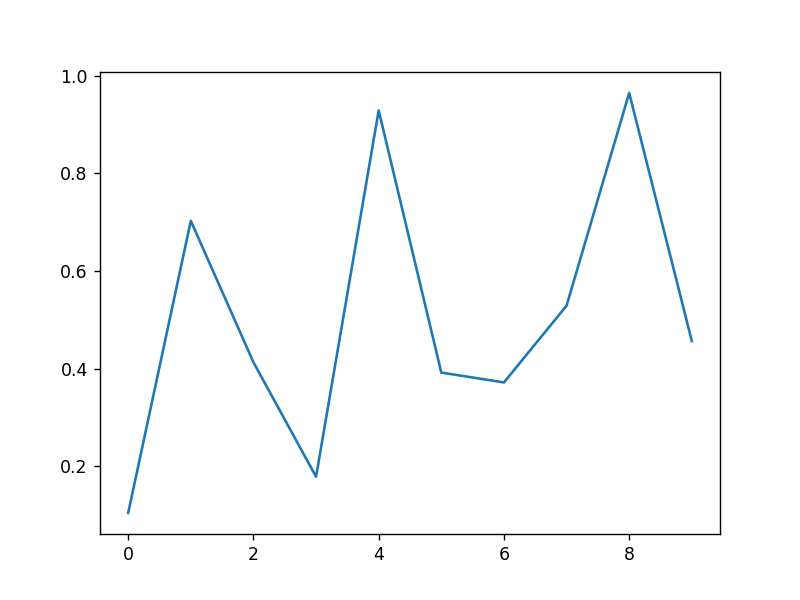

In [7]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(10))
text=fig.text(0,0,'',va="bottom", ha="left")
def onclick(event):
    
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    ax.plot(event.xdata, event.ydata,'ro', linewidth = 5)
    tx = 'xdata=%f, ydata=%f' % (event.xdata, event.ydata)
    text.set_text(tx)
    plt.gcf().canvas.draw_idle()

cid = fig.canvas.mpl_connect('button_press_event', onclick)